# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Chardinal Martin Butarbutar]
- **Email:** [chardinal.23288@mhs.unesa.ac.id]
- **ID Dicoding:** [chardinal_martin_butarbutar_jkPl]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Kategori produk apa yang menghasilkan total pendapatan (*revenue*) tertinggi dan terendah?
- Pertanyaan 2: Bagaimana karakteristik segmentasi pelanggan berdasarkan analisis RFM (Recency, Frequency, Monetary)?
- Pertanyaan 3: Bagaimana tren jumlah pesanan dan total pendapatan dari bulan ke bulan?
- Pertanyaan 4: Metode pembayaran apa yang paling dominan digunakan oleh pelanggan?
- Pertanyaan 5: Apakah terdapat korelasi antara lama waktu pengiriman dengan tingkat kepuasan pelanggan (*review score*)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import datetime as dt
import warnings
sns.set_theme(style="darkgrid")
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

In [2]:
# Memuat semua dataset
# Sesuaikan path jika perlu
DATA_PATH = "E-Commerce_Public_Dataset/"

customers_df = pd.read_csv(DATA_PATH + "customers_dataset.csv")
orders_df = pd.read_csv(DATA_PATH + "orders_dataset.csv")
order_items_df = pd.read_csv(DATA_PATH + "order_items_dataset.csv")
products_df = pd.read_csv(DATA_PATH + "products_dataset.csv")
product_category_name_translation_df = pd.read_csv(DATA_PATH + "product_category_name_translation.csv")
payments_df = pd.read_csv(DATA_PATH + "order_payments_dataset.csv")
reviews_df = pd.read_csv(DATA_PATH + "order_reviews_dataset.csv")

print("Semua dataset berhasil dimuat!")
print(f"  customers     : {customers_df.shape}")
print(f"  orders        : {orders_df.shape}")
print(f"  order_items   : {order_items_df.shape}")
print(f"  products      : {products_df.shape}")
print(f"  payments      : {payments_df.shape}")
print(f"  reviews       : {reviews_df.shape}")

Semua dataset berhasil dimuat!
  customers     : (99441, 5)
  orders        : (99441, 8)
  order_items   : (112650, 7)
  products      : (32951, 9)
  payments      : (103886, 5)
  reviews       : (99224, 7)


**Insight:**
- Dataset terdiri dari 7 file CSV yang saling berelasi membentuk skema bintang (star schema).
- `orders_df` adalah tabel fakta utama yang menghubungkan semua dimensi lainnya.

### Assessing Data

In [3]:
# Cek info dan missing values untuk setiap dataframe utama
dfs = {
    'orders': orders_df,
    'order_items': order_items_df,
    'products': products_df,
    'payments': payments_df,
    'reviews': reviews_df,
    'customers': customers_df
}

for name, df in dfs.items():
    print(f"\n{'='*50}")
    print(f"DataFrame: {name}  | Shape: {df.shape}")
    print(f"Missing values:\n{df.isnull().sum()[df.isnull().sum() > 0]}")
    print(f"Duplicates: {df.duplicated().sum()}")


DataFrame: orders  | Shape: (99441, 8)
Missing values:
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64
Duplicates: 0

DataFrame: order_items  | Shape: (112650, 7)
Missing values:
Series([], dtype: int64)
Duplicates: 0

DataFrame: products  | Shape: (32951, 9)
Missing values:
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
Duplicates: 0

DataFrame: payments  | Shape: (103886, 5)
Missing values:
Series([], dtype: int64)
Duplicates: 0

DataFrame: reviews  | Shape: (99224, 7)
Missing values:
review_comment_title      87656
review_comment_message    58247
dtype: int64
Duplicates: 0

DataFrame: customers  | Shape: (99441, 5)
Missing values:
Series([], dtype: int64)
Duplicates: 0


In [4]:
# Cek tipe data untuk setiap dataframe utama
dfs = {
    'orders': orders_df,
    'order_items': order_items_df,
    'products': products_df,
    'payments': payments_df,
    'reviews': reviews_df,
    'customers': customers_df
}

for name, df in dfs.items():
    print(f"\n{'='*50}")
    
    # Tipe data tiap kolom
    print("\nTipe data tiap kolom:")
    print(df.dtypes)



Tipe data tiap kolom:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


Tipe data tiap kolom:
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


Tipe data tiap kolom:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object


Tipe 

In [5]:
print("\nStatistik deskriptif payments_df:")
payments_df.describe()


Statistik deskriptif payments_df:


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- `orders_df` memiliki missing values pada kolom tanggal pengiriman (`order_delivered_customer_date`, `order_approved_at`) — ini wajar untuk order yang belum/tidak terselesaikan.
- `products_df` memiliki beberapa missing values pada kolom dimensi produk.
- Kolom tanggal masih bertipe `object`, perlu dikonversi ke `datetime`.
- Tidak ada duplikat yang signifikan pada tabel-tabel utama.

### Cleaning Data

In [6]:
# 1. Konversi kolom tanggal ke datetime
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in date_cols:
    orders_df[col] = pd.to_datetime(orders_df[col])

# 2. Filter hanya order dengan status 'delivered' untuk analisis revenue & kepuasan
orders_delivered = orders_df[orders_df['order_status'] == 'delivered'].copy()
print(f"Total orders: {len(orders_df)} | Delivered orders: {len(orders_delivered)}")

# 3. Hapus baris dengan tanggal pengiriman yang null (penting untuk analisis delivery time)
orders_delivered.dropna(subset=['order_delivered_customer_date', 'order_purchase_timestamp'], inplace=True)
print(f"Orders after dropping null delivery dates: {len(orders_delivered)}")

# 4. Hitung lama pengiriman (hari)
orders_delivered['delivery_days'] = (
    orders_delivered['order_delivered_customer_date'] - orders_delivered['order_purchase_timestamp']
).dt.days

# 5. Hapus anomali (delivery_days negatif atau sangat ekstrem > 120 hari)
orders_delivered = orders_delivered[(orders_delivered['delivery_days'] >= 0) & (orders_delivered['delivery_days'] <= 120)]
print(f"Orders after removing delivery anomalies: {len(orders_delivered)}")

Total orders: 99441 | Delivered orders: 96478
Orders after dropping null delivery dates: 96470
Orders after removing delivery anomalies: 96427


In [7]:
# 6. Agregasi payments per order (menghindari duplikat dari multiple payments)
payments_agg = payments_df.groupby('order_id').agg(
    payment_value=('payment_value', 'sum'),
    payment_type=('payment_type', lambda x: x.mode()[0])  # ambil metode dominan per order
).reset_index()

# 7. Agregasi reviews per order (ambil rata-rata jika ada lebih dari 1 review)
reviews_agg = reviews_df.groupby('order_id')['review_score'].mean().reset_index()

# 8. Merge products dengan terjemahan kategori
products_df = pd.merge(products_df, product_category_name_translation_df,
                        on='product_category_name', how='left')
products_df['product_category_name_english'].fillna('unknown', inplace=True)

print("Agregasi payments dan reviews selesai.")
print(f"payments_agg shape: {payments_agg.shape}")
print(f"reviews_agg shape: {reviews_agg.shape}")

Agregasi payments dan reviews selesai.
payments_agg shape: (99440, 3)
reviews_agg shape: (98673, 2)


In [8]:
# 9. Buat main_df dengan merge bertahap
main_df = pd.merge(order_items_df, orders_delivered[['order_id', 'customer_id',
                    'order_purchase_timestamp', 'order_delivered_customer_date',
                    'delivery_days']], on='order_id', how='inner')

main_df = pd.merge(main_df, customers_df[['customer_id', 'customer_unique_id',
                    'customer_city', 'customer_state']], on='customer_id', how='left')

main_df = pd.merge(main_df, products_df[['product_id', 'product_category_name_english']],
                    on='product_id', how='left')

main_df = pd.merge(main_df, payments_agg, on='order_id', how='left')
main_df = pd.merge(main_df, reviews_agg, on='order_id', how='left')

# 10. Tambahkan kolom bantu waktu
main_df['year_month'] = main_df['order_purchase_timestamp'].dt.to_period('M')
main_df['revenue'] = main_df['price'] + main_df['freight_value']

print(f"main_df final shape: {main_df.shape}")
print(f"Missing values in main_df:")
print(main_df.isnull().sum()[main_df.isnull().sum() > 0])
main_df.head(10)

main_df final shape: (110141, 20)
Missing values in main_df:
payment_value      3
payment_type       3
review_score     825
dtype: int64


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_purchase_timestamp,order_delivered_customer_date,delivery_days,customer_unique_id,customer_city,customer_state,product_category_name_english,payment_value,payment_type,review_score,year_month,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-20 23:43:48,7,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,cool_stuff,72.19,credit_card,5.0,2017-09,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-12 16:04:24,16,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,pet_shop,259.83,credit_card,4.0,2017-04,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-22 13:19:16,7,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,furniture_decor,216.87,credit_card,5.0,2018-01,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-14 13:32:39,6,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,perfumery,25.78,credit_card,4.0,2018-08,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-03-01 16:42:31,25,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,garden_tools,218.04,credit_card,5.0,2017-02,218.04
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,816cbea969fe5b689b39cfc97a506742,2017-05-15 21:42:34,2017-05-22 13:44:35,6,85c835d128beae5b4ce8602c491bf385,uberaba,MG,housewares,34.59,boleto,4.0,2017-05,34.59
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,32e2e6ab09e778d99bf2e0ecd4898718,2017-12-10 11:53:48,2017-12-18 22:03:38,8,635d9ac1680f03288e72ada3a1035803,guararapes,SP,telephony,31.75,credit_card,4.0,2017-12,31.75
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,9ed5e522dd9dd85b4af4a077526d8117,2018-07-04 12:08:27,2018-07-09 14:04:07,5,fda4476abb6307ab3c415b7e6d026526,praia grande,SP,garden_tools,880.75,credit_card,5.0,2018-07,880.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,16150771dfd4776261284213b89c304e,2018-03-19 18:40:33,2018-03-29 18:17:31,9,639d23421f5517f69d0c3d6e6564cf0e,santos,SP,health_beauty,157.60,credit_card,1.0,2018-03,157.60
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,351d3cb2cee3c7fd0af6616c82df21d3,2018-07-02 13:59:39,2018-07-04 17:28:31,2,0782c41380992a5a533489063df0eef6,jandira,SP,books_technical,65.39,credit_card,4.0,2018-07,65.39


In [9]:
# Hapus baris yang kosong jika terdapat missing values pada
main_df.dropna(inplace=True)
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109313 entries, 0 to 110140
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       109313 non-null  object        
 1   order_item_id                  109313 non-null  int64         
 2   product_id                     109313 non-null  object        
 3   seller_id                      109313 non-null  object        
 4   shipping_limit_date            109313 non-null  object        
 5   price                          109313 non-null  float64       
 6   freight_value                  109313 non-null  float64       
 7   customer_id                    109313 non-null  object        
 8   order_purchase_timestamp       109313 non-null  datetime64[ns]
 9   order_delivered_customer_date  109313 non-null  datetime64[ns]
 10  delivery_days                  109313 non-null  int64         
 11  custo

In [10]:
# Hapus baris jika terdapat baris yang duplikat pada main_df
main_df.drop_duplicates(inplace=True)
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109313 entries, 0 to 110140
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       109313 non-null  object        
 1   order_item_id                  109313 non-null  int64         
 2   product_id                     109313 non-null  object        
 3   seller_id                      109313 non-null  object        
 4   shipping_limit_date            109313 non-null  object        
 5   price                          109313 non-null  float64       
 6   freight_value                  109313 non-null  float64       
 7   customer_id                    109313 non-null  object        
 8   order_purchase_timestamp       109313 non-null  datetime64[ns]
 9   order_delivered_customer_date  109313 non-null  datetime64[ns]
 10  delivery_days                  109313 non-null  int64         
 11  custo

**Insight:**
- Setelah cleaning, tersisa ~100k+ item baris dari order yang terdelivery.
- Kolom `revenue` dihitung dari `price + freight_value` (total yang dibayar pelanggan per item).
- Missing values pada `review_score` (~10%) adalah order yang tidak mendapat ulasan — ini normal untuk e-commerce.

## Exploratory Data Analysis (EDA)

### Explore : Revenue per Kategori Produk (Pertanyaan 1)

In [11]:
revenue_by_category = main_df.groupby('product_category_name_english').agg(
    total_revenue=('revenue', 'sum'),
    total_orders=('order_id', 'nunique'),
    avg_revenue_per_order=('revenue', 'mean')
).sort_values('total_revenue', ascending=False).reset_index()

print("Top 10 Kategori berdasarkan Revenue:")
print(revenue_by_category.head(10).to_string(index=False))

print("\nBottom 10 Kategori berdasarkan Revenue:")
print(revenue_by_category.tail(10).to_string(index=False))

Top 10 Kategori berdasarkan Revenue:
product_category_name_english  total_revenue  total_orders  avg_revenue_per_order
                health_beauty     1402309.36          8599             149.213594
                watches_gifts     1255551.37          5449             216.101785
               bed_bath_table     1212937.88          9174             112.018644
               sports_leisure     1110176.40          7482             132.590039
        computers_accessories     1027354.57          6496             135.107124
              furniture_decor      872234.27          6256             108.016628
                   housewares      753530.67          5707             111.584580
                   cool_stuff      683709.42          3529             185.437868
                         auto      660274.87          3788             161.239284
                 garden_tools      561205.09          3426             132.422154

Bottom 10 Kategori berdasarkan Revenue:
product_category_nam

**Insight:**
- Kategori `health_beauty`, `watches_gifts`, dan `bed_bath_table` cenderung mendominasi revenue secara keseluruhan, menunjukkan permintaan pasar yang tinggi dan volume transaksi yang besar.
- `health_beauty` memiliki total order tertinggi, menandakan kategori ini kuat dari sisi volume penjualan (high demand market).
- `watches_gifts` memiliki rata-rata revenue per order yang cukup tinggi dibandingkan kategori top lainnya, mengindikasikan kombinasi antara volume dan nilai transaksi yang baik.
- `cool_stuff` dan `auto` memiliki avg_revenue_per_order relatif tinggi, yang menunjukkan karakteristik produk dengan harga lebih premium meskipun total order tidak setinggi kategori utama.
- Kategori bottom seperti `fashion_female_clothing`, `fashion_sport`, dan `la_cuisine` memiliki total order dan revenue yang sangat rendah, menandakan rendahnya demand atau kurang optimalnya strategi pemasaran pada kategori tersebut.
- `security_and_services` memiliki jumlah order sangat sedikit namun avg_revenue_per_order tinggi, menunjukkan potensi produk bernilai tinggi (high ticket size) tetapi belum memiliki volume pasar yang kuat.
- Secara umum, revenue tinggi pada kategori top lebih banyak didorong oleh volume order, sedangkan pada beberapa kategori niche didorong oleh tingginya nilai per transaksi.

### Explore : RFM Analysis (Pertanyaan 2)

In [12]:
# ── Hitung RFM & Segmentasi Pelanggan ─────────────────────────────────

# Tanggal referensi = hari setelah tanggal transaksi terakhir
snapshot_date = main_df["order_purchase_timestamp"].max() + dt.timedelta(days=1)

rfm_df = main_df.groupby("customer_unique_id").agg(
    recency  =("order_purchase_timestamp", lambda x: (snapshot_date - x.max()).days),
    frequency=("order_id", "nunique"),
    monetary =("payment_value", "sum")
).reset_index()

print("===== Statistik Deskriptif RFM =====")
print(rfm_df[["recency","frequency","monetary"]].describe())
print(f"Jumlah pelanggan unik: {len(rfm_df):,}")
print("Contoh 5 baris pertama:")
print(rfm_df.head())

# ── Scoring RFM 1–5 (5 = terbaik) ─────────────────────────────────────
# Batas threshold berdasarkan kuartil distribusi data aktual

def recency_score(x):
    if x <= 114:  return 5   # Q1 — baru saja bertransaksi
    elif x <= 219: return 4  # Q2
    elif x <= 346: return 3  # Q3
    elif x <= 500: return 2
    else:          return 1  # sudah sangat lama tidak aktif

def frequency_score(x):
    if x == 1:    return 1   # hanya 1x transaksi
    elif x == 2:  return 2
    elif x <= 3:  return 3
    elif x <= 5:  return 4
    else:         return 5   # pelanggan sangat aktif

def monetary_score(x):
    if x <= 63.68:   return 1  # Q1
    elif x <= 112.83: return 2  # Q2
    elif x <= 201.13: return 3  # Q3
    elif x <= 500:    return 4
    else:             return 5  # high spender

rfm_df["R_score"] = rfm_df["recency"].apply(recency_score)
rfm_df["F_score"] = rfm_df["frequency"].apply(frequency_score)
rfm_df["M_score"] = rfm_df["monetary"].apply(monetary_score)
rfm_df["RFM_score"] = (
    rfm_df["R_score"].astype(str) +
    rfm_df["F_score"].astype(str) +
    rfm_df["M_score"].astype(str)
)

# ── Segmentasi Pelanggan ───────────────────────────────────────────────
def rfm_segment(row):
    r, f, m = row["R_score"], row["F_score"], row["M_score"]
    if r >= 4 and f >= 4 and m >= 4:      return "Champions"
    elif f >= 4 and m >= 3 and r >= 3:    return "Loyal Customers"
    elif r >= 4 and (f <= 2 or m <= 2):   return "Promising"
    elif r <= 2 and (f >= 3 or m >= 3):   return "At Risk"
    else:                                  return "Lost"

rfm_df["segment"] = rfm_df.apply(rfm_segment, axis=1)

print("===== Distribusi Segmen Pelanggan =====")
print(rfm_df["segment"].value_counts().to_string())
print(f"Total: {len(rfm_df):,} pelanggan unik")

===== Statistik Deskriptif RFM =====
            recency     frequency       monetary
count  92705.000000  92705.000000   92705.000000
mean     237.728116      1.033191     210.880617
std      152.557420      0.208469     625.871227
min        1.000000      1.000000       9.590000
25%      114.000000      1.000000      63.680000
50%      219.000000      1.000000     112.830000
75%      346.000000      1.000000     201.130000
max      695.000000     15.000000  109312.640000
Jumlah pelanggan unik: 92,705
Contoh 5 baris pertama:
                 customer_unique_id  recency  frequency  monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      112          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      115          1     27.19
2  0000f46a3911fa3c0805444483337064      537          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89
===== Distribusi Segmen Pelanggan =====
segment
Promising          46434

**Insight:**

- Penentuan batas scoring `Recency` menggunakan nilai kuartil (Q1=114, Q2=219, Q3=346), sehingga pembagian skor berbasis distribusi aktual data dan mencerminkan perilaku mayoritas pelanggan.
- Rata-rata `Recency` sebesar 237 hari menunjukkan banyak pelanggan sudah cukup lama tidak bertransaksi, sehingga pembobotan skor rendah (>346 hari) menjadi penting untuk identifikasi churn.
- Pada `Frequency`, median dan Q1–Q3 semuanya bernilai 1, menandakan sebagian besar pelanggan hanya melakukan 1 transaksi. Oleh karena itu, skor dibuat lebih granular untuk nilai >1 agar pelanggan repeat buyer lebih ter-highlight.
- Distribusi `Monetary` cukup skewed (max sangat tinggi ~109k), sehingga batas skor menggunakan kuartil (63.68, 112.83, 201.13) dan threshold tambahan 500 untuk memisahkan pelanggan high spender secara lebih jelas.
- Rata-rata monetary (~210) mendekati batas skor 3, sehingga skor 4 dan 5 benar-benar merepresentasikan pelanggan dengan nilai belanja di atas rata-rata signifikan.
- Secara keseluruhan, metode scoring ini berbasis statistik deskriptif (quantile-based threshold) sehingga segmentasi lebih objektif dan sesuai dengan karakteristik distribusi data.

- Segmen `Promising` mendominasi dengan jumlah terbesar, menunjukkan banyak pelanggan baru atau pelanggan dengan potensi berkembang menjadi loyal jika dikelola dengan baik.
- Jumlah `Lost` juga sangat tinggi, mengindikasikan tingkat churn yang signifikan dan perlunya strategi reaktivasi (retargeting, promo comeback).
- Segmen `At Risk` masih cukup besar, artinya ada banyak pelanggan yang mulai tidak aktif dan berpotensi berpindah ke `Lost` jika tidak segera ditindaklanjuti.
- Jumlah `Champions` dan `Loyal Customers` sangat kecil dibandingkan total populasi, menunjukkan tingkat retensi pelanggan premium masih rendah.
- Secara strategis, fokus utama bisnis sebaiknya pada konversi `Promising` menjadi `Loyal Customers`, serta menjalankan campaign re-engagement untuk menekan jumlah `Lost`.

### Explore : Tren Bulanan (Pertanyaan 3)

In [13]:
monthly_trend = main_df.groupby('year_month').agg(
    total_orders=('order_id', 'nunique'),
    total_revenue=('revenue', 'sum')
).reset_index()

monthly_trend['year_month_str'] = monthly_trend['year_month'].astype(str)
monthly_trend['orders_MA3'] = monthly_trend['total_orders'].rolling(3, min_periods=1).mean()
monthly_trend['revenue_MA3'] = monthly_trend['total_revenue'].rolling(3, min_periods=1).mean()

print(f"Period analisis: {monthly_trend['year_month'].min()} s/d {monthly_trend['year_month'].max()}")
print(f"Total bulan: {len(monthly_trend)}")
monthly_trend.tail(5)

Period analisis: 2016-10 s/d 2018-08
Total bulan: 22


,year_month,total_orders,total_revenue,year_month_str,orders_MA3,revenue_MA3
17,2018-04,6752,1126141.24,2018-04,6734.333333,1.064276e+06
18,2018-05,6721,1122420.22,2018-05,6807.000000,1.119281e+06
19,2018-06,6071,1008701.19,2018-06,6514.666667,1.085754e+06
20,2018-07,6118,1014280.98,2018-07,6303.333333,1.048467e+06
21,2018-08,6330,981721.72,2018-08,6173.000000,1.001568e+06


**Insight:**
- Secara umum terlihat adanya tren pertumbuhan positif dari awal periode (2016) hingga 2018, ditunjukkan oleh peningkatan total order dan total revenue dari waktu ke waktu.
- Moving Average (MA3) pada orders dan revenue menunjukkan tren yang relatif stabil dengan kecenderungan meningkat sebelum akhirnya mengalami sedikit penurunan di pertengahan 2018.
- Pada periode 2018-04 hingga 2018-05 terlihat performa yang cukup tinggi (baik dari sisi order maupun revenue), sebelum mengalami penurunan bertahap hingga 2018-08.
- Penurunan pada 2018-06 hingga 2018-08 bisa mengindikasikan efek musiman (seasonality) atau tidak adanya event besar seperti promo nasional / campaign besar.
- Lonjakan pada bulan-bulan tertentu kemungkinan berkaitan dengan event belanja besar, campaign promosi, atau momentum musiman yang mendorong peningkatan transaksi secara signifikan.
- Secara keseluruhan, bisnis menunjukkan pola growth yang sehat namun tetap dipengaruhi oleh faktor musiman dan strategi promosi.

### Explore : Metode Pembayaran (Pertanyaan 4)

In [14]:
# Analisis per order (setelah agregasi untuk menghindari double count)
payment_analysis = payments_df.copy()

payment_freq = payment_analysis.groupby('payment_type').agg(
    count=('order_id', 'count'),
    avg_value=('payment_value', 'mean'),
    total_value=('payment_value', 'sum')
).sort_values('count', ascending=False).reset_index()

payment_freq['pct'] = (payment_freq['count'] / payment_freq['count'].sum() * 100).round(2)

print("Analisis Metode Pembayaran:")
print(payment_freq.to_string(index=False))

Analisis Metode Pembayaran:
payment_type  count  avg_value  total_value   pct
 credit_card  76795 163.319021  12542084.19 73.92
      boleto  19784 145.034435   2869361.27 19.04
     voucher   5775  65.703354    379436.87  5.56
  debit_card   1529 142.570170    217989.79  1.47
 not_defined      3   0.000000         0.00  0.00


**Insight:**
- Metode pembayaran `credit_card` sangat mendominasi dengan sekitar 73% dari total transaksi dan total nilai transaksi terbesar, menunjukkan preferensi utama pelanggan terhadap pembayaran kartu kredit.
- `boleto` menempati posisi kedua dengan sekitar 19% transaksi, menandakan metode ini masih menjadi alternatif populer, terutama bagi pelanggan yang tidak menggunakan kartu kredit.
- Meskipun jumlah transaksi `voucher` cukup signifikan, kontribusi terhadap total nilai transaksi relatif kecil karena rata-rata nilai transaksinya lebih rendah.
- `debit_card` memiliki persentase penggunaan yang sangat kecil (~1%), menunjukkan metode ini kurang diminati dibandingkan kartu kredit.
- Secara keseluruhan, struktur pembayaran sangat terpusat pada kartu kredit, sehingga strategi promosi seperti cicilan atau cashback kartu kredit berpotensi sangat efektif.

### Explore : Korelasi Waktu Pengiriman & Review Score (Pertanyaan 5)

In [15]:
# Merge delivery_days dengan review_score
delivery_review = main_df[['order_id', 'delivery_days', 'review_score']].dropna().drop_duplicates(subset='order_id')

# Kategorisasi kecepatan pengiriman
def delivery_category(days):
    if days <= 7:
        return '1-Fast (≤7 days)'
    elif days <= 14:
        return '2-Normal (8-14 days)'
    elif days <= 21:
        return '3-Slow (15-21 days)'
    else:
        return '4-Very Slow (>21 days)'

delivery_review['delivery_category'] = delivery_review['delivery_days'].apply(delivery_category)

delivery_stats = delivery_review.groupby('delivery_category').agg(
    avg_review=('review_score', 'mean'),
    order_count=('order_id', 'count')
).reset_index()

corr = delivery_review['delivery_days'].corr(delivery_review['review_score'])
print(f"Korelasi Pearson (delivery_days vs review_score): {corr:.4f}")
print("\nRata-rata review score per kategori pengiriman:")
print(delivery_stats.to_string(index=False))

Korelasi Pearson (delivery_days vs review_score): -0.3476

Rata-rata review score per kategori pengiriman:
     delivery_category  avg_review  order_count
      1-Fast (≤7 days)    4.408669        33539
  2-Normal (8-14 days)    4.289154        36190
   3-Slow (15-21 days)    4.102332        15264
4-Very Slow (>21 days)    3.005917        10789


**Insight:**
- Terdapat korelasi Pearson sebesar -0.3476 antara `delivery_days` dan `review_score`, yang menunjukkan hubungan negatif sedang: semakin lama waktu pengiriman, semakin rendah tingkat kepuasan pelanggan.
- Kategori pengiriman `Fast (≤7 days)` memiliki rata-rata review tertinggi (~4.41), menandakan pelanggan sangat menghargai kecepatan pengiriman.
- `Normal (8–14 days)` masih mempertahankan rata-rata review yang cukup baik (~4.29), menunjukkan toleransi pelanggan masih cukup tinggi dalam rentang ini.
- Penurunan mulai terlihat pada kategori `Slow (15–21 days)` dengan rata-rata review ~4.10.
- Pengiriman `Very Slow (>21 days)` mengalami penurunan signifikan dengan rata-rata review sekitar 3.01, yang menunjukkan dampak besar keterlambatan terhadap kepuasan pelanggan.
- Secara strategis, optimalisasi logistik dan pengurangan delivery time berpotensi langsung meningkatkan customer satisfaction dan rating toko.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Revenue per Kategor Produk

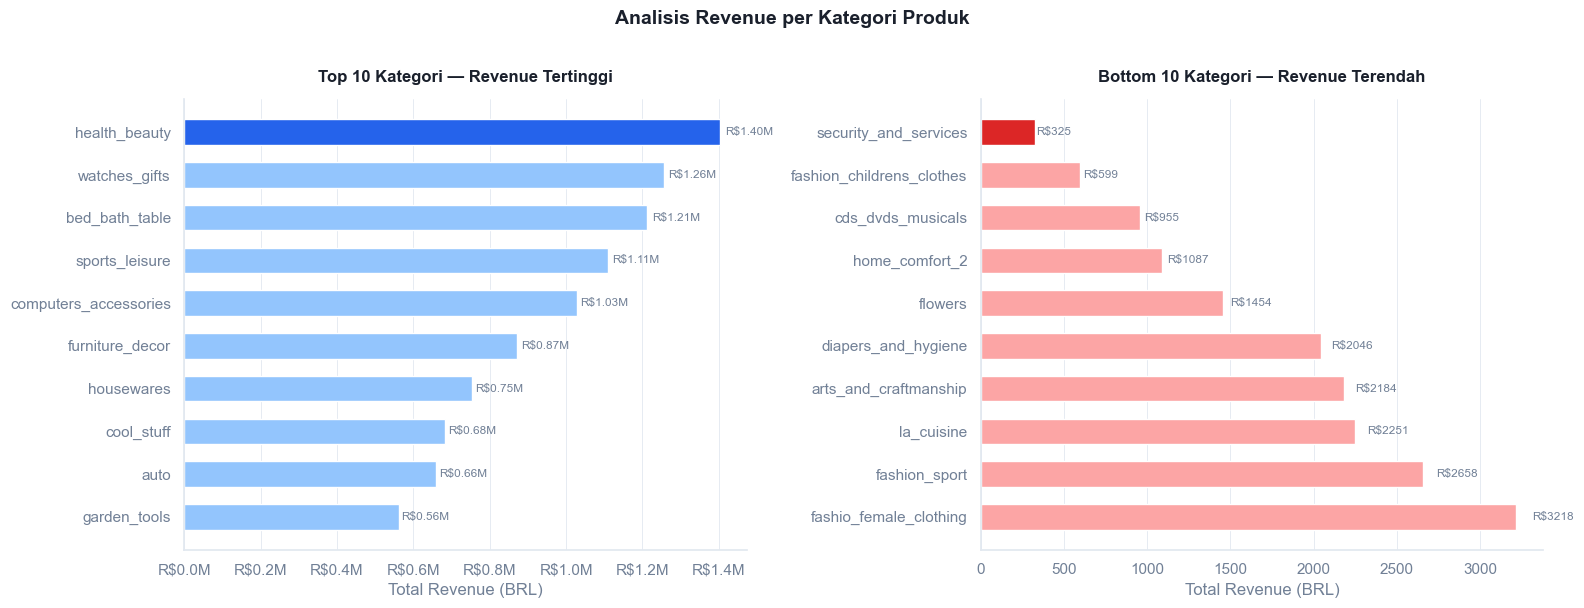

In [16]:
# ─── Warna konsisten dengan dashboard ───────────────────────────
C = {
    'primary': '#2563EB', 'green': '#059669', 'red': '#DC2626',
    'amber': '#D97706',   'muted': '#718096', 'border': '#E2E8F0',
    'text': '#1A202C',
    'chart': ['#2563EB','#059669','#D97706','#DC2626','#7C3AED','#0891B2']
}

def style_ax(ax):
    ax.set_facecolor('white')
    for sp in ['top','right']: ax.spines[sp].set_visible(False)
    for sp in ['left','bottom']: ax.spines[sp].set_color(C['border'])
    ax.tick_params(colors=C['muted'])
    ax.xaxis.label.set_color(C['muted'])
    ax.yaxis.label.set_color(C['muted'])

top10    = revenue_by_category.head(10).copy()
bottom10 = revenue_by_category.tail(10).iloc[::-1].copy()

fig, axes = plt.subplots(1, 2, figsize=(16, 6), facecolor='white')

# --- Top 10 ---
style_ax(axes[0])
colors_top = [C['primary']] + ['#93C5FD'] * 9
bars1 = axes[0].barh(top10['product_category_name_english'],
                     top10['total_revenue'], color=colors_top, height=0.6)
axes[0].invert_yaxis()
axes[0].set_title('Top 10 Kategori — Revenue Tertinggi', fontsize=12,
                   fontweight='bold', color=C['text'], pad=12)
axes[0].set_xlabel('Total Revenue (BRL)')
axes[0].xaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f'R${x/1e6:.1f}M'))
axes[0].grid(axis='x', color=C['border'], linewidth=0.6, alpha=1)
axes[0].grid(axis='y', alpha=0)
for bar in bars1:
    w = bar.get_width()
    axes[0].text(w + w*0.01, bar.get_y() + bar.get_height()/2,
                 f'R${w/1e6:.2f}M', va='center', fontsize=8.5, color=C['muted'])

# --- Bottom 10 ---
style_ax(axes[1])
colors_bot = [C['red']] + ['#FCA5A5'] * 9
bars2 = axes[1].barh(bottom10['product_category_name_english'],
                     bottom10['total_revenue'], color=colors_bot, height=0.6)
axes[1].invert_yaxis()
axes[1].set_title('Bottom 10 Kategori — Revenue Terendah', fontsize=12,
                   fontweight='bold', color=C['text'], pad=12)
axes[1].set_xlabel('Total Revenue (BRL)')
axes[1].grid(axis='x', color=C['border'], linewidth=0.6, alpha=1)
axes[1].grid(axis='y', alpha=0)
for bar in bars2:
    w = bar.get_width()
    axes[1].text(w + max(w*0.03, 3), bar.get_y() + bar.get_height()/2,
                 f'R${w:.0f}', va='center', fontsize=8.5, color=C['muted'])

plt.suptitle('Analisis Revenue per Kategori Produk', fontsize=14,
             fontweight='bold', color=C['text'], y=1.01)
plt.tight_layout()
plt.savefig('plot_q1_revenue_category.png', dpi=150,
            bbox_inches='tight', facecolor='white')
plt.show()


**Insight:**
- Kategori `health_beauty`, `watches_gifts`, dan `bed_bath_table` menjadi penyumbang revenue tertinggi.
- Revenue besar pada top kategori terutama didorong oleh volume transaksi yang tinggi.
- Kategori seperti `fashion_female_clothing` dan `security_and_services` memiliki kontribusi revenue sangat rendah.
- Terdapat gap yang sangat besar antara top 10 dan bottom 10 kategori, menunjukkan distribusi revenue tidak merata.

### Pertanyaan 2: Segmentasu Pelangan RFM

Ringkasan Segmen Pelanggan:
        segment  jumlah_pelanggan  avg_recency  avg_frequency  avg_monetary
      Promising             46434       112.09           1.03        211.46
           Lost             34979       335.63           1.03        164.63
        At Risk             11249       452.34           1.05        346.81
      Champions                37        97.97           5.11       1796.21
Loyal Customers                 6       289.83           4.17        763.62


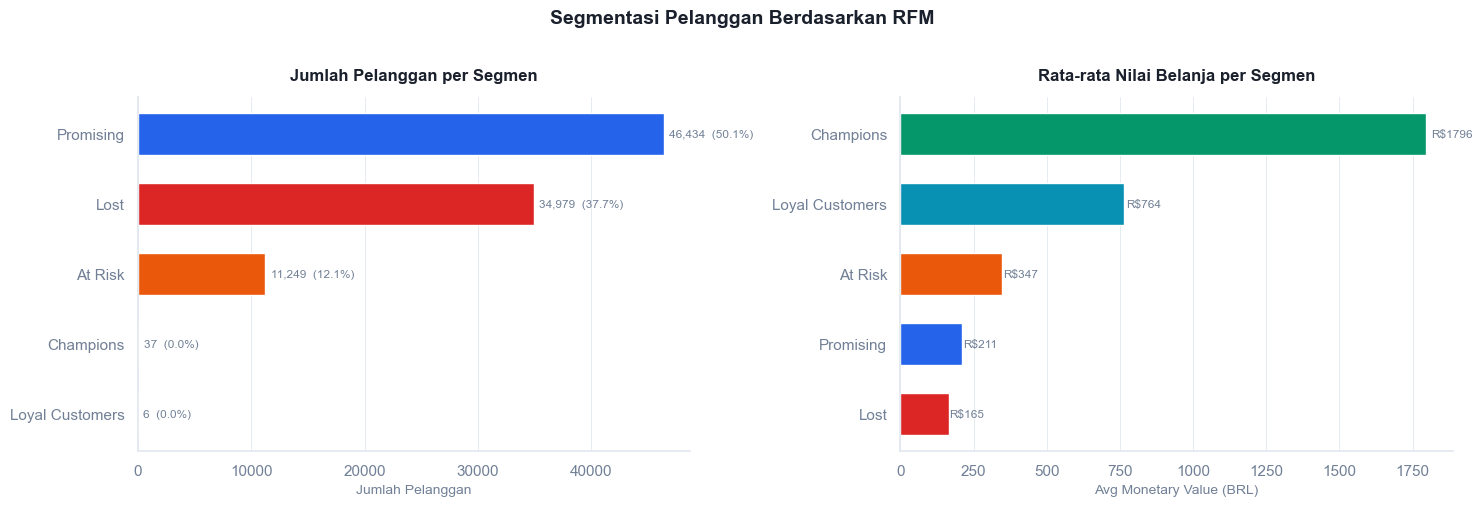

In [17]:
SEG_COLORS = {
    'Champions':       '#059669',
    'Loyal Customers': '#0891B2',
    'Promising':       '#2563EB',
    'At Risk':         '#EA580C',
    'Lost':            '#DC2626',
}

segment_summary = rfm_df.groupby('segment').agg(
    jumlah_pelanggan=('customer_unique_id', 'count'),
    avg_recency=('recency',   'mean'),
    avg_frequency=('frequency', 'mean'),
    avg_monetary=('monetary',  'mean')
).round(2).reset_index().sort_values('jumlah_pelanggan', ascending=False)

print('Ringkasan Segmen Pelanggan:')
print(segment_summary.to_string(index=False))

def style_ax(ax):
    ax.set_facecolor('white')
    for sp in ['top','right']: ax.spines[sp].set_visible(False)
    for sp in ['left','bottom']: ax.spines[sp].set_color('#E2E8F0')
    ax.tick_params(colors='#718096')

fig, axes = plt.subplots(1, 2, figsize=(15, 5), facecolor='white')

# --- Panel kiri: jumlah pelanggan per segmen ---
style_ax(axes[0])
seg_colors = [SEG_COLORS.get(s, '#718096') for s in segment_summary['segment']]
total_cust = segment_summary['jumlah_pelanggan'].sum()
bars = axes[0].barh(segment_summary['segment'],
                    segment_summary['jumlah_pelanggan'],
                    color=seg_colors, height=0.6)
axes[0].invert_yaxis()
axes[0].set_xlabel('Jumlah Pelanggan', color='#718096', fontsize=10)
axes[0].set_title('Jumlah Pelanggan per Segmen', fontsize=12,
                   fontweight='bold', color='#1A202C', pad=12)
axes[0].grid(axis='x', color='#E2E8F0', linewidth=0.6)
axes[0].grid(axis='y', alpha=0)
for bar, (_, row) in zip(bars, segment_summary.iterrows()):
    pct = row['jumlah_pelanggan'] / total_cust * 100
    axes[0].text(bar.get_width() + total_cust * 0.005,
                 bar.get_y() + bar.get_height() / 2,
                 f"{int(row['jumlah_pelanggan']):,}  ({pct:.1f}%)",
                 va='center', fontsize=8.5, color='#718096')

# --- Panel kanan: avg monetary per segmen ---
style_ax(axes[1])
sorted_seg = segment_summary.sort_values('avg_monetary')
seg_colors2 = [SEG_COLORS.get(s, '#718096') for s in sorted_seg['segment']]
bars2 = axes[1].barh(sorted_seg['segment'], sorted_seg['avg_monetary'],
                     color=seg_colors2, height=0.6)
axes[1].set_xlabel('Avg Monetary Value (BRL)', color='#718096', fontsize=10)
axes[1].set_title('Rata-rata Nilai Belanja per Segmen', fontsize=12,
                   fontweight='bold', color='#1A202C', pad=12)
axes[1].grid(axis='x', color='#E2E8F0', linewidth=0.6)
axes[1].grid(axis='y', alpha=0)
for bar in bars2:
    w = bar.get_width()
    axes[1].text(w + w * 0.01, bar.get_y() + bar.get_height() / 2,
                 f'R${w:.0f}', va='center', fontsize=8.5, color='#718096')

plt.suptitle('Segmentasi Pelanggan Berdasarkan RFM', fontsize=14,
             fontweight='bold', color='#1A202C', y=1.01)
plt.tight_layout()
plt.savefig('plot_q2_rfm_segment.png', dpi=150,
            bbox_inches='tight', facecolor='white')
plt.show()


**Insight:**
- Segmen `Promising` mendominasi lebih dari 50% total pelanggan, menunjukkan sebagian besar customer masih berada pada tahap awal lifecycle dan memiliki potensi besar untuk dikembangkan menjadi pelanggan loyal.
- Segmen `Lost` juga sangat besar (±37.7%), mengindikasikan tingkat churn yang tinggi dan perlunya strategi reaktivasi seperti promo khusus atau campaign retargeting.
- Segmen `Champions` memiliki rata-rata nilai belanja (avg_monetary) paling tinggi (~R$1796) dan frekuensi tertinggi (5.11), namun jumlahnya sangat kecil. Ini adalah pelanggan paling bernilai dan harus dipertahankan dengan program loyalty eksklusif.
- `Loyal Customers` juga memiliki avg_monetary tinggi (~R$764) dan frekuensi cukup besar (4.17), menunjukkan kontribusi revenue yang stabil meskipun jumlahnya sangat sedikit.
- Segmen `At Risk` memiliki nilai belanja cukup tinggi (~R$347) namun recency sangat besar (452 hari), artinya mereka dulu bernilai tetapi sudah lama tidak bertransaksi — ini adalah target utama untuk win-back campaign.
- Secara keseluruhan, struktur pelanggan menunjukkan revenue besar berasal dari segmen kecil (Champions & Loyal), sementara mayoritas populasi berada di tahap awal atau sudah churn, sehingga strategi bisnis perlu fokus pada retensi dan konversi segmen `Promising` menjadi pelanggan loyal.

### Pertanyaan 3: Tren Bulanan

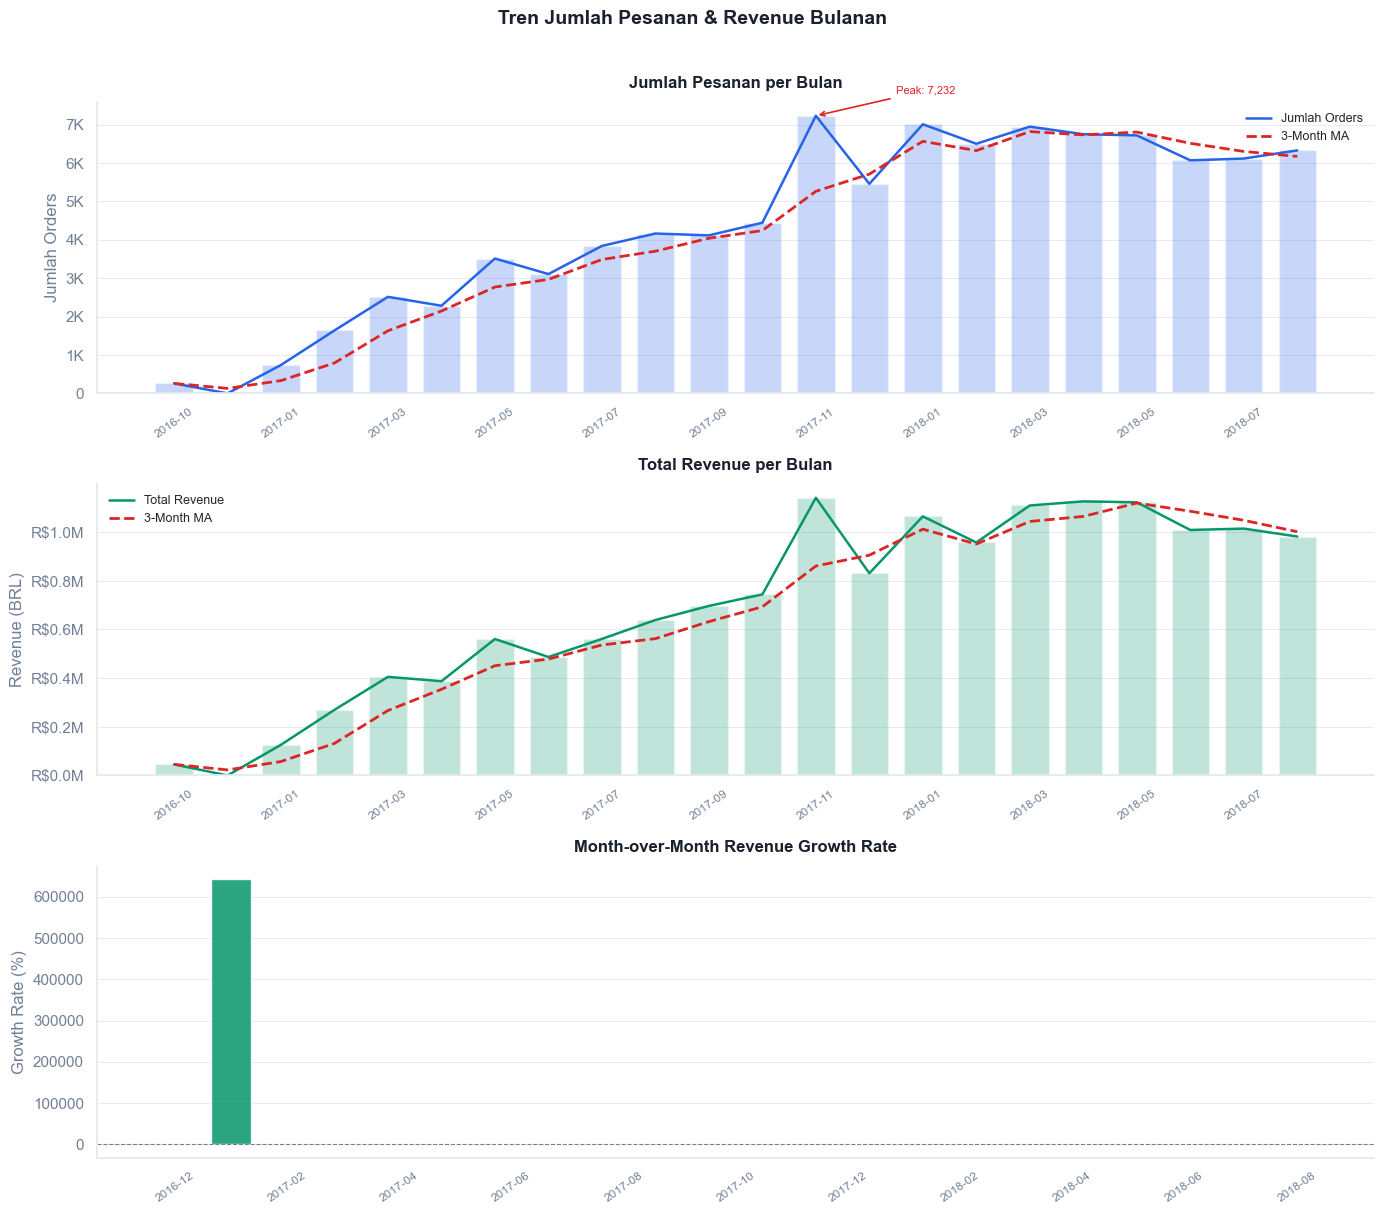

In [18]:
monthly_trend['year_month_str'] = monthly_trend['year_month'].astype(str)
monthly_trend['rev_growth'] = monthly_trend['total_revenue'].pct_change() * 100

C_PRIMARY = '#2563EB'
C_GREEN   = '#059669'
C_RED     = '#DC2626'
C_MUTED   = '#718096'
C_BORDER  = '#E2E8F0'
C_TEXT    = '#1A202C'

def style_ax(ax):
    ax.set_facecolor('white')
    for sp in ['top', 'right']: ax.spines[sp].set_visible(False)
    for sp in ['left', 'bottom']: ax.spines[sp].set_color(C_BORDER)
    ax.tick_params(colors=C_MUTED)
    ax.xaxis.label.set_color(C_MUTED)
    ax.yaxis.label.set_color(C_MUTED)

x     = np.arange(len(monthly_trend))
step  = max(1, len(monthly_trend) // 10)
xlbls = [monthly_trend['year_month_str'].iloc[i]
          for i in range(0, len(monthly_trend), step)]

fig, axes = plt.subplots(3, 1, figsize=(14, 12), facecolor='white')

# --- Panel 1: Jumlah Orders ---
style_ax(axes[0])
axes[0].bar(x, monthly_trend['total_orders'], color=C_PRIMARY, alpha=0.25, width=0.7)
axes[0].plot(x, monthly_trend['total_orders'], color=C_PRIMARY,
             linewidth=1.8, label='Jumlah Orders')
if 'orders_MA3' in monthly_trend.columns:
    axes[0].plot(x, monthly_trend['orders_MA3'], color=C_RED,
                 linewidth=2, linestyle='--', label='3-Month MA')
peak_idx = monthly_trend['total_orders'].idxmax()
axes[0].annotate(
    f"Peak: {int(monthly_trend['total_orders'].max()):,}",
    xy=(peak_idx, monthly_trend['total_orders'].max()),
    xytext=(peak_idx + 1.5, monthly_trend['total_orders'].max() * 1.08),
    fontsize=8, color=C_RED,
    arrowprops=dict(arrowstyle='->', color=C_RED, lw=1.2)
)
axes[0].set_ylabel('Jumlah Orders')
axes[0].set_title('Jumlah Pesanan per Bulan', fontsize=12,
                   fontweight='bold', color=C_TEXT, pad=10)
axes[0].yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda v, _: f'{v/1e3:.0f}K' if v >= 1000 else str(int(v))))
axes[0].set_xticks(x[::step])
axes[0].set_xticklabels(xlbls, rotation=35, fontsize=8.5)
axes[0].legend(fontsize=9, frameon=False)
axes[0].grid(axis='y', color=C_BORDER, linewidth=0.6)
axes[0].grid(axis='x', alpha=0)

# --- Panel 2: Total Revenue ---
style_ax(axes[1])
axes[1].bar(x, monthly_trend['total_revenue'], color=C_GREEN, alpha=0.25, width=0.7)
axes[1].plot(x, monthly_trend['total_revenue'], color=C_GREEN,
             linewidth=1.8, label='Total Revenue')
if 'revenue_MA3' in monthly_trend.columns:
    axes[1].plot(x, monthly_trend['revenue_MA3'], color=C_RED,
                 linewidth=2, linestyle='--', label='3-Month MA')
axes[1].set_ylabel('Revenue (BRL)')
axes[1].set_title('Total Revenue per Bulan', fontsize=12,
                   fontweight='bold', color=C_TEXT, pad=10)
axes[1].yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda v, _: f'R${v/1e6:.1f}M'))
axes[1].set_xticks(x[::step])
axes[1].set_xticklabels(xlbls, rotation=35, fontsize=8.5)
axes[1].legend(fontsize=9, frameon=False)
axes[1].grid(axis='y', color=C_BORDER, linewidth=0.6)
axes[1].grid(axis='x', alpha=0)

# --- Panel 3: MoM Growth Rate ---
style_ax(axes[2])
growth_vals = monthly_trend['rev_growth'].iloc[1:].values
bar_colors  = [C_GREEN if v >= 0 else C_RED for v in growth_vals]
axes[2].bar(range(len(growth_vals)), growth_vals,
            color=bar_colors, width=0.7, alpha=0.85)
axes[2].axhline(0, color=C_MUTED, linewidth=0.8, linestyle='--')
step2 = max(1, (len(monthly_trend) - 1) // 10)
axes[2].set_xticks(range(0, len(growth_vals), step2))
axes[2].set_xticklabels(
    [monthly_trend['year_month_str'].iloc[i + 1]
     for i in range(0, len(growth_vals), step2)],
    rotation=35, fontsize=8.5)
axes[2].set_ylabel('Growth Rate (%)')
axes[2].set_title('Month-over-Month Revenue Growth Rate', fontsize=12,
                   fontweight='bold', color=C_TEXT, pad=10)
axes[2].grid(axis='y', color=C_BORDER, linewidth=0.6)
axes[2].grid(axis='x', alpha=0)

plt.suptitle('Tren Jumlah Pesanan & Revenue Bulanan', fontsize=14,
             fontweight='bold', color=C_TEXT, y=1.01)
plt.tight_layout()
plt.savefig('plot_q3_monthly_trend.png', dpi=150,
            bbox_inches='tight', facecolor='white')
plt.show()

**Insight:**
- Terlihat tren pertumbuhan yang sangat kuat dari akhir 2016 hingga awal 2018, baik dari sisi jumlah pesanan maupun total revenue.
- Lonjakan signifikan terjadi pada periode akhir 2017 (sekitar Oktober–Desember), yang kemungkinan dipengaruhi oleh event besar seperti campaign promosi atau momentum belanja akhir tahun.
- Moving Average (3-Month MA) menunjukkan tren naik yang konsisten hingga mencapai puncaknya di awal hingga pertengahan 2018.
- Setelah mencapai puncak pada sekitar April–Mei 2018, terlihat adanya penurunan bertahap baik pada jumlah pesanan maupun revenue hingga Agustus 2018.
- Pola revenue sangat sejalan dengan pola jumlah pesanan, menunjukkan bahwa pertumbuhan pendapatan terutama didorong oleh peningkatan volume transaksi, bukan kenaikan signifikan pada nilai rata-rata per order.
- Secara keseluruhan, bisnis menunjukkan fase growth yang agresif selama 2017 hingga awal 2018, diikuti fase stabilisasi/penyesuaian pada pertengahan 2018.

### Pertanyaan 4: Metode Pembayaran

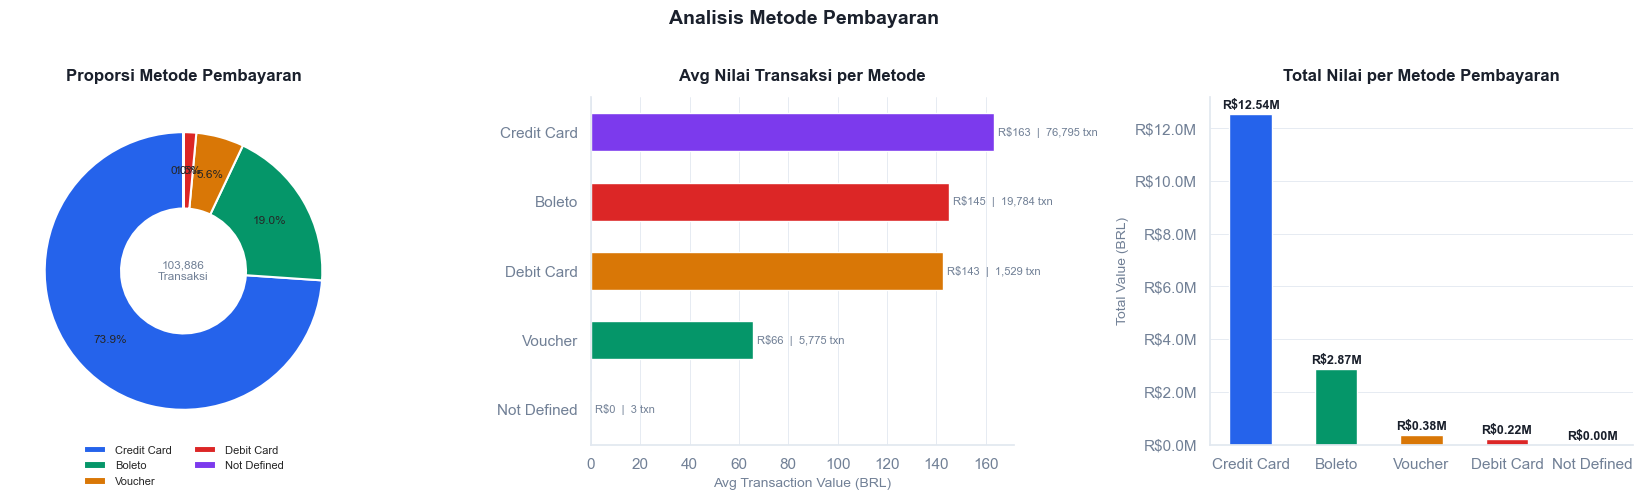

In [19]:
CHART_COLORS = ['#2563EB','#059669','#D97706','#DC2626','#7C3AED','#0891B2']
C_MUTED  = '#718096'
C_BORDER = '#E2E8F0'
C_TEXT   = '#1A202C'

def style_ax(ax):
    ax.set_facecolor('white')
    for sp in ['top','right']: ax.spines[sp].set_visible(False)
    for sp in ['left','bottom']: ax.spines[sp].set_color(C_BORDER)
    ax.tick_params(colors=C_MUTED)

fig, axes = plt.subplots(1, 3, figsize=(17, 5), facecolor='white')

sorted_pay = payment_freq.sort_values('count', ascending=False)

# --- Panel 1: Donut chart proporsi ---
axes[0].set_facecolor('white')
wedges, _, autotexts = axes[0].pie(
    sorted_pay['count'], labels=None,
    autopct='%1.1f%%',
    colors=CHART_COLORS[:len(sorted_pay)],
    startangle=90, pctdistance=0.72,
    wedgeprops=dict(width=0.55, edgecolor='white', linewidth=1.5)
)
for at in autotexts: at.set_fontsize(8.5)
total_txn = int(sorted_pay['count'].sum())
axes[0].text(0, 0, f'{total_txn:,}\nTransaksi',
             ha='center', va='center', fontsize=8.5, color=C_MUTED)
axes[0].legend(wedges,
               sorted_pay['payment_type'].str.replace('_', ' ').str.title(),
               loc='lower center', bbox_to_anchor=(0.5, -0.15),
               ncol=2, fontsize=8, frameon=False)
axes[0].set_title('Proporsi Metode Pembayaran', fontsize=12,
                   fontweight='bold', color=C_TEXT, pad=12)

# --- Panel 2: Avg transaction value ---
style_ax(axes[1])
sorted_avg = payment_freq.sort_values('avg_value')
bars2 = axes[1].barh(
    sorted_avg['payment_type'].str.replace('_', ' ').str.title(),
    sorted_avg['avg_value'],
    color=CHART_COLORS[:len(sorted_avg)], height=0.55)
axes[1].set_xlabel('Avg Transaction Value (BRL)', color=C_MUTED, fontsize=10)
axes[1].set_title('Avg Nilai Transaksi per Metode', fontsize=12,
                   fontweight='bold', color=C_TEXT, pad=12)
axes[1].grid(axis='x', color=C_BORDER, linewidth=0.6)
axes[1].grid(axis='y', alpha=0)
for bar, (_, row) in zip(bars2, sorted_avg.iterrows()):
    w = bar.get_width()
    axes[1].text(w + payment_freq['avg_value'].max() * 0.01,
                 bar.get_y() + bar.get_height() / 2,
                 f'R${w:.0f}  |  {int(row["count"]):,} txn',
                 va='center', fontsize=8, color=C_MUTED)

# --- Panel 3: Total value per metode ---
style_ax(axes[2])
sorted_total = payment_freq.sort_values('total_value', ascending=False)
bars3 = axes[2].bar(
    sorted_total['payment_type'].str.replace('_', ' ').str.title(),
    sorted_total['total_value'],
    color=CHART_COLORS[:len(sorted_total)], width=0.5)
axes[2].yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda v, _: f'R${v/1e6:.1f}M'))
axes[2].set_ylabel('Total Value (BRL)', color=C_MUTED, fontsize=10)
axes[2].set_title('Total Nilai per Metode Pembayaran', fontsize=12,
                   fontweight='bold', color=C_TEXT, pad=12)
axes[2].grid(axis='y', color=C_BORDER, linewidth=0.6)
axes[2].grid(axis='x', alpha=0)
for bar in bars3:
    h = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width() / 2,
                 h + payment_freq['total_value'].max() * 0.015,
                 f'R${h/1e6:.2f}M', ha='center',
                 fontsize=9, fontweight='600', color=C_TEXT)

plt.suptitle('Analisis Metode Pembayaran', fontsize=14,
             fontweight='bold', color=C_TEXT, y=1.01)
plt.tight_layout()
plt.savefig('plot_q4_payment_method.png', dpi=150,
            bbox_inches='tight', facecolor='white')
plt.show()

**Insight:**
- Credit card mendominasi dengan lebih dari 70% transaksi.
- Voucher memiliki rata-rata nilai transaksi yang lebih rendah — sesuai fungsinya sebagai diskon.

### Pertanyaan 5: Korelasi Waktu Pengiriman & Review Score

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


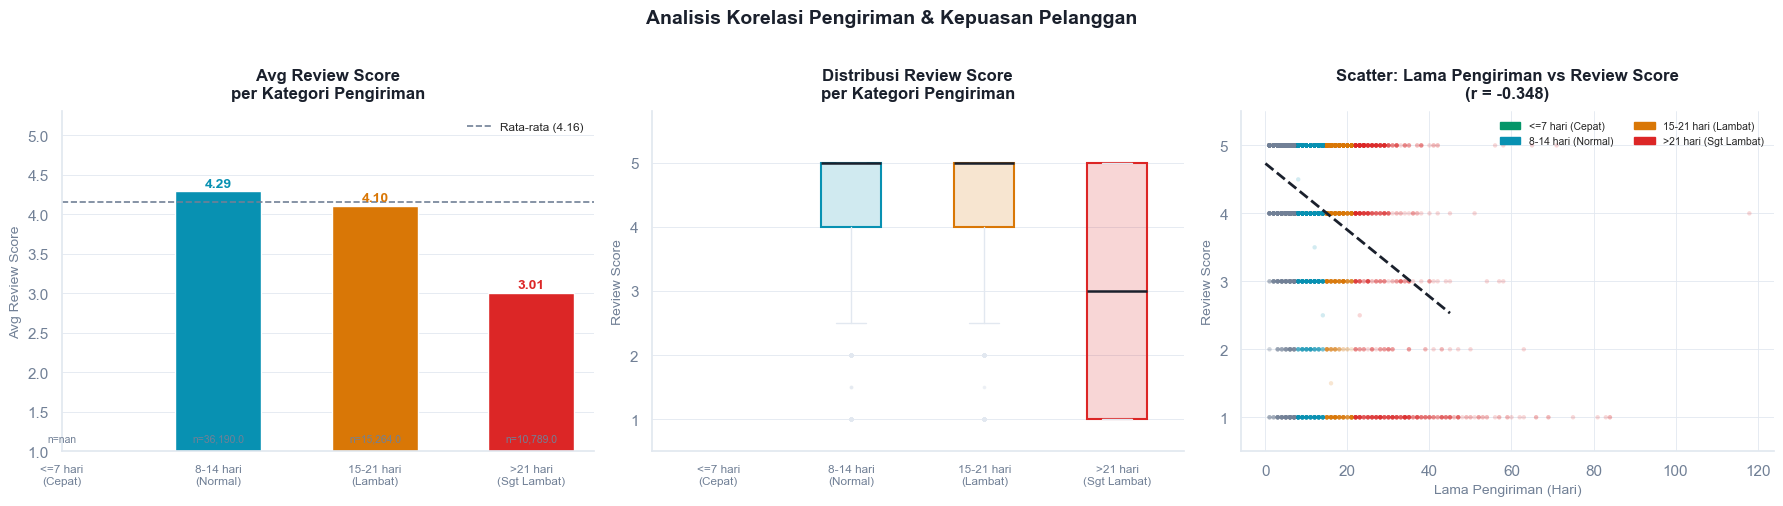

In [20]:
import matplotlib.patches as mpatches

order_cat  = ['1-Fast (<=7 days)', '2-Normal (8-14 days)',
               '3-Slow (15-21 days)', '4-Very Slow (>21 days)']
short_lbl  = ['<=7 hari\n(Cepat)', '8-14 hari\n(Normal)',
               '15-21 hari\n(Lambat)', '>21 hari\n(Sgt Lambat)']
cat_colors = ['#059669', '#0891B2', '#D97706', '#DC2626']
C_MUTED    = '#718096'
C_BORDER   = '#E2E8F0'
C_TEXT     = '#1A202C'

plot_data = delivery_review[
    delivery_review['delivery_category'].isin(order_cat)].copy()
corr = delivery_review['delivery_days'].corr(delivery_review['review_score'])

def style_ax(ax):
    ax.set_facecolor('white')
    for sp in ['top','right']: ax.spines[sp].set_visible(False)
    for sp in ['left','bottom']: ax.spines[sp].set_color(C_BORDER)
    ax.tick_params(colors=C_MUTED)

fig, axes = plt.subplots(1, 3, figsize=(18, 5), facecolor='white')

# --- Panel 1: Avg review per kategori ---
style_ax(axes[0])
stats = plot_data.groupby('delivery_category').agg(
    avg=('review_score', 'mean'), n=('order_id', 'count')
).reindex(order_cat).reset_index()
avg_global = delivery_review['review_score'].mean()
bars = axes[0].bar(range(4), stats['avg'], color=cat_colors, width=0.55)
axes[0].axhline(avg_global, color=C_MUTED, linewidth=1.2, linestyle='--',
                label=f'Rata-rata ({avg_global:.2f})')
axes[0].set_xticks(range(4))
axes[0].set_xticklabels(short_lbl, fontsize=8.5)
axes[0].set_ylabel('Avg Review Score', color=C_MUTED, fontsize=10)
axes[0].set_ylim(1, 5.3)
axes[0].set_title('Avg Review Score\nper Kategori Pengiriman', fontsize=12,
                   fontweight='bold', color=C_TEXT, pad=10)
axes[0].legend(fontsize=8.5, frameon=False)
axes[0].grid(axis='y', color=C_BORDER, linewidth=0.6)
axes[0].grid(axis='x', alpha=0)
for i, (bar, row) in enumerate(zip(bars, stats.itertuples())):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.06,
                 f'{row.avg:.2f}', ha='center', fontsize=10,
                 fontweight='600', color=cat_colors[i])
    axes[0].text(bar.get_x() + bar.get_width()/2, 1.12,
                 f'n={row.n:,}', ha='center', fontsize=7.5, color=C_MUTED)

# --- Panel 2: Box plot distribusi ---
style_ax(axes[1])
box_data = [plot_data[plot_data['delivery_category'] == c]['review_score']
            .dropna().values for c in order_cat]
bp = axes[1].boxplot(
    box_data, patch_artist=True, notch=False,
    medianprops=dict(color=C_TEXT, linewidth=1.8),
    whiskerprops=dict(color=C_BORDER, linewidth=1),
    capprops=dict(color=C_BORDER),
    flierprops=dict(marker='o', markerfacecolor=C_BORDER,
                    markersize=2.5, alpha=0.4, markeredgecolor='none')
)
for patch, color in zip(bp['boxes'], cat_colors):
    patch.set_facecolor(color + '30')
    patch.set_edgecolor(color)
    patch.set_linewidth(1.5)
axes[1].set_xticklabels(short_lbl, fontsize=8.5)
axes[1].set_ylabel('Review Score', color=C_MUTED, fontsize=10)
axes[1].set_ylim(0.5, 5.8)
axes[1].set_title('Distribusi Review Score\nper Kategori Pengiriman', fontsize=12,
                   fontweight='bold', color=C_TEXT, pad=10)
axes[1].grid(axis='y', color=C_BORDER, linewidth=0.6)
axes[1].grid(axis='x', alpha=0)

# --- Panel 3: Scatter + trend line ---
style_ax(axes[2])
sample_dr = delivery_review.sample(
    min(6000, len(delivery_review)), random_state=42)
cat_map    = {c: i for i, c in enumerate(order_cat)}
dot_colors = [cat_colors[cat_map[c]] if c in cat_map else C_MUTED
              for c in sample_dr['delivery_category']]
axes[2].scatter(sample_dr['delivery_days'], sample_dr['review_score'],
                c=dot_colors, alpha=0.18, s=10, edgecolors='none')
z  = np.polyfit(sample_dr['delivery_days'], sample_dr['review_score'], 1)
xl = np.linspace(0, delivery_review['delivery_days'].quantile(0.99), 200)
axes[2].plot(xl, np.poly1d(z)(xl), color=C_TEXT, linewidth=2,
             linestyle='--', label=f'Tren linear  (r={corr:.3f})')
legend_patches = [mpatches.Patch(color=c, label=sl.replace('\n',' '))
                  for c, sl in zip(cat_colors, short_lbl)]
axes[2].legend(handles=legend_patches, fontsize=7.5,
               ncol=2, loc='upper right', frameon=False)
axes[2].set_xlabel('Lama Pengiriman (Hari)', color=C_MUTED, fontsize=10)
axes[2].set_ylabel('Review Score', color=C_MUTED, fontsize=10)
axes[2].set_ylim(0.5, 5.5)
axes[2].set_title(
    f'Scatter: Lama Pengiriman vs Review Score\n(r = {corr:.3f})',
    fontsize=12, fontweight='bold', color=C_TEXT, pad=10)
axes[2].grid(color=C_BORDER, linewidth=0.6)

plt.suptitle('Analisis Korelasi Pengiriman & Kepuasan Pelanggan',
             fontsize=14, fontweight='bold', color=C_TEXT, y=1.01)
plt.tight_layout()
plt.savefig('plot_q5_delivery_review.png', dpi=150,
            bbox_inches='tight', facecolor='white')
plt.show()

**Insight:**
- Korelasi negatif terbukti: pengiriman lebih cepat → review score lebih tinggi.
- Pengiriman >21 hari secara konsisten mendapat review rendah (median ≈ 3).
- Mempercepat pengiriman adalah salah satu cara paling efektif meningkatkan kepuasan pelanggan.

## Analisis Lanjutan (Opsional)

=== Statistik Rata-rata RFM per Segmen ===
        segment  Pelanggan  Recency  Frequency  Monetary
      Promising      46434   112.09       1.03    211.46
           Lost      34979   335.63       1.03    164.63
        At Risk      11249   452.34       1.05    346.81
      Champions         37    97.97       5.11   1796.21
Loyal Customers          6   289.83       4.17    763.62


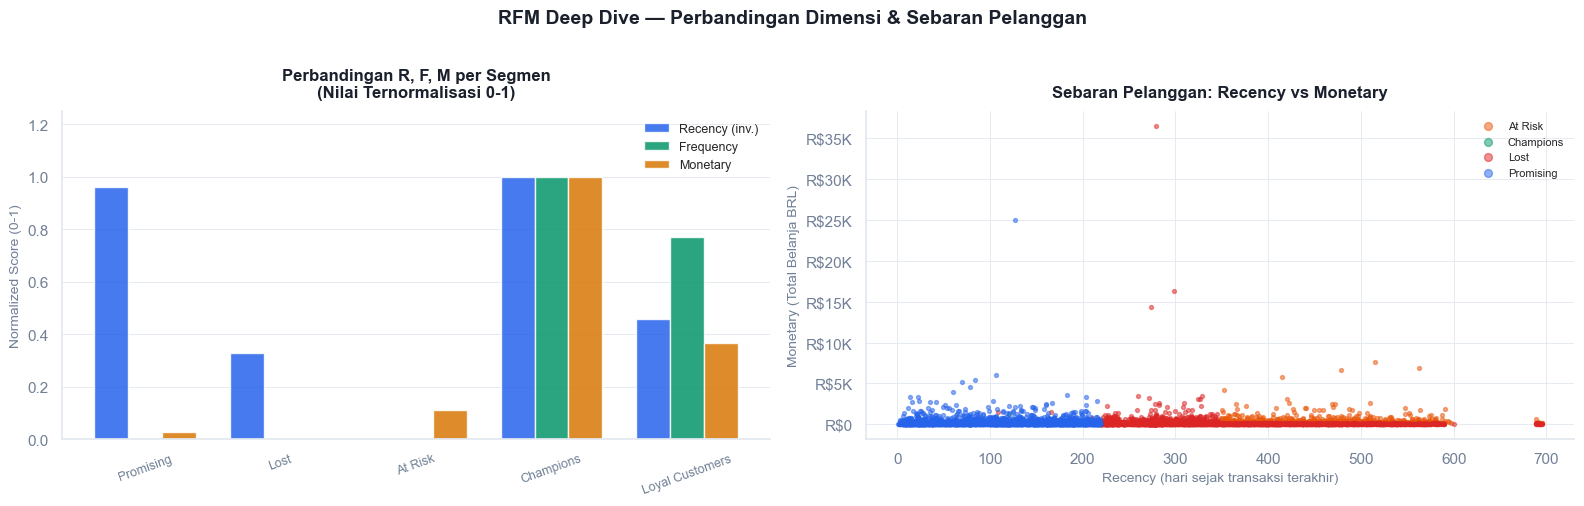

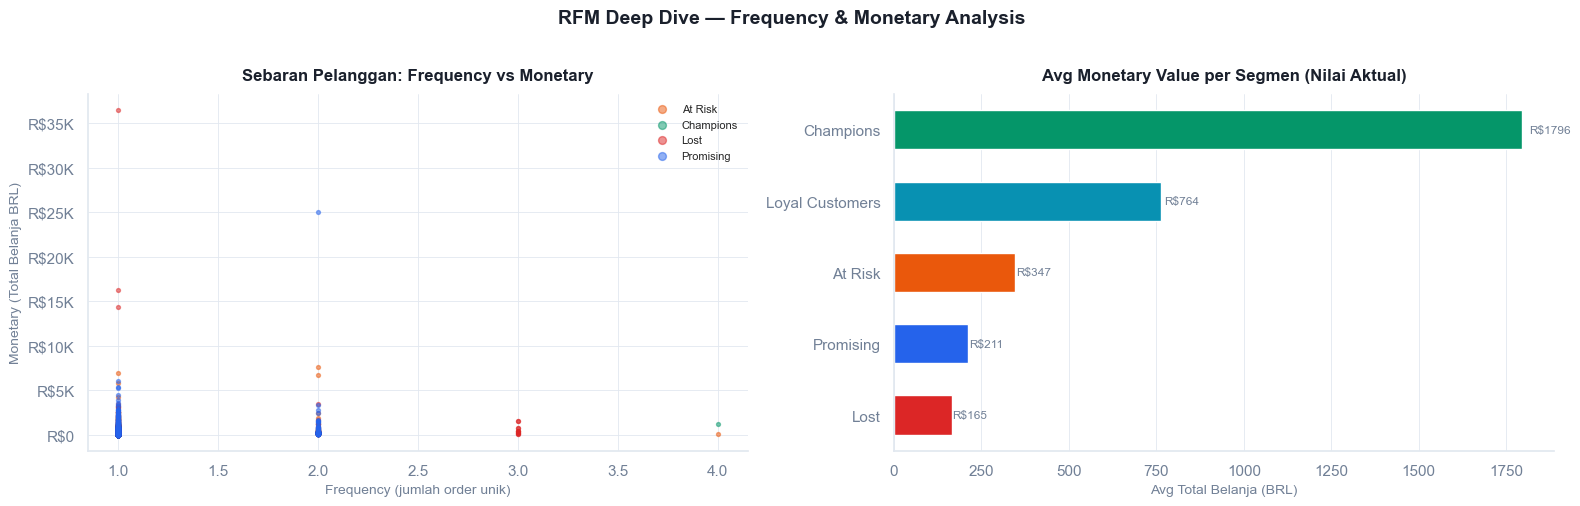


=== Rekomendasi Strategi per Segmen ===
  [Champions         ]       37 pelanggan  ->  Program loyalitas eksklusif & reward VIP.
  [Loyal Customers   ]        6 pelanggan  ->  Early access produk baru & program referral.
  [Promising         ]   46,434 pelanggan  ->  Voucher pembelian kedua & bundle offer.
  [At Risk           ]   11,249 pelanggan  ->  Kampanye win-back: diskon personal + reminder.
  [Lost              ]   34,979 pelanggan  ->  Re-engagement campaign; fokus akuisisi baru.


In [21]:
# ── RFM Deep Dive ─────────────────────────────────────────────────────
SEG_COLORS = {
    'Champions':       '#059669',
    'Loyal Customers': '#0891B2',
    'Promising':       '#2563EB',
    'At Risk':         '#EA580C',
    'Lost':            '#DC2626',
}
C_PRIMARY = '#2563EB'
C_GREEN   = '#059669'
C_AMBER   = '#D97706'
C_MUTED   = '#718096'
C_BORDER  = '#E2E8F0'
C_TEXT    = '#1A202C'

def style_ax(ax):
    ax.set_facecolor('white')
    for sp in ['top','right']: ax.spines[sp].set_visible(False)
    for sp in ['left','bottom']: ax.spines[sp].set_color(C_BORDER)
    ax.tick_params(colors=C_MUTED)

seg_stat = rfm_df.groupby('segment').agg(
    Pelanggan =('customer_unique_id', 'count'),
    Recency   =('recency',   'mean'),
    Frequency =('frequency', 'mean'),
    Monetary  =('monetary',  'mean')
).round(2).reset_index().sort_values('Pelanggan', ascending=False)

print('=== Statistik Rata-rata RFM per Segmen ===')
print(seg_stat.to_string(index=False))

# ── Plot 1: Normalized grouped bar + Scatter R vs M ───────────────────
fig, axes = plt.subplots(1, 2, figsize=(16, 5), facecolor='white')

# Normalisasi 0-1; Recency di-invert (nilai kecil = lebih baik)
rfm_norm = seg_stat[['segment','Recency','Frequency','Monetary']].copy()
for col in ['Recency','Frequency','Monetary']:
    mi, mx = rfm_norm[col].min(), rfm_norm[col].max()
    rfm_norm[col] = (rfm_norm[col] - mi) / (mx - mi + 1e-9)
rfm_norm['Recency'] = 1 - rfm_norm['Recency']

style_ax(axes[0])
xp = np.arange(len(rfm_norm))
w  = 0.25
axes[0].bar(xp - w, rfm_norm['Recency'],   width=w, color=C_PRIMARY,
            alpha=0.85, label='Recency (inv.)')
axes[0].bar(xp,     rfm_norm['Frequency'], width=w, color=C_GREEN,
            alpha=0.85, label='Frequency')
axes[0].bar(xp + w, rfm_norm['Monetary'],  width=w, color=C_AMBER,
            alpha=0.85, label='Monetary')
axes[0].set_xticks(xp)
axes[0].set_xticklabels(rfm_norm['segment'], rotation=20, fontsize=9)
axes[0].set_ylabel('Normalized Score (0-1)', color=C_MUTED, fontsize=10)
axes[0].set_ylim(0, 1.25)
axes[0].set_title('Perbandingan R, F, M per Segmen\n(Nilai Ternormalisasi 0-1)',
                   fontsize=12, fontweight='bold', color=C_TEXT, pad=10)
axes[0].legend(fontsize=9, frameon=False)
axes[0].grid(axis='y', color=C_BORDER, linewidth=0.6)
axes[0].grid(axis='x', alpha=0)

style_ax(axes[1])
sample_rfm = rfm_df.sample(min(8000, len(rfm_df)), random_state=42)
for seg, grp in sample_rfm.groupby('segment'):
    axes[1].scatter(grp['recency'], grp['monetary'],
                    color=SEG_COLORS.get(seg, C_MUTED),
                    s=8, alpha=0.5, label=seg)
axes[1].set_xlabel('Recency (hari sejak transaksi terakhir)',
                    color=C_MUTED, fontsize=10)
axes[1].set_ylabel('Monetary (Total Belanja BRL)',
                    color=C_MUTED, fontsize=10)
axes[1].set_title('Sebaran Pelanggan: Recency vs Monetary',
                   fontsize=12, fontweight='bold', color=C_TEXT, pad=10)
axes[1].legend(fontsize=8, frameon=False, markerscale=2)
axes[1].grid(color=C_BORDER, linewidth=0.6)
axes[1].yaxis.set_major_formatter(
    mticker.FuncFormatter(
        lambda v, _: f'R${v/1e3:.0f}K' if v >= 1000 else f'R${v:.0f}'))

plt.suptitle('RFM Deep Dive — Perbandingan Dimensi & Sebaran Pelanggan',
             fontsize=14, fontweight='bold', color=C_TEXT, y=1.01)
plt.tight_layout()
plt.savefig('plot_advanced_rfm_1.png', dpi=150,
            bbox_inches='tight', facecolor='white')
plt.show()

# ── Plot 2: Scatter F vs M + Avg Monetary bar ─────────────────────────
fig2, axes2 = plt.subplots(1, 2, figsize=(16, 5), facecolor='white')

style_ax(axes2[0])
for seg, grp in sample_rfm.groupby('segment'):
    axes2[0].scatter(grp['frequency'], grp['monetary'],
                     color=SEG_COLORS.get(seg, C_MUTED),
                     s=8, alpha=0.5, label=seg)
axes2[0].set_xlabel('Frequency (jumlah order unik)',
                     color=C_MUTED, fontsize=10)
axes2[0].set_ylabel('Monetary (Total Belanja BRL)',
                     color=C_MUTED, fontsize=10)
axes2[0].set_title('Sebaran Pelanggan: Frequency vs Monetary',
                    fontsize=12, fontweight='bold', color=C_TEXT, pad=10)
axes2[0].legend(fontsize=8, frameon=False, markerscale=2)
axes2[0].grid(color=C_BORDER, linewidth=0.6)
axes2[0].yaxis.set_major_formatter(
    mticker.FuncFormatter(
        lambda v, _: f'R${v/1e3:.0f}K' if v >= 1000 else f'R${v:.0f}'))

style_ax(axes2[1])
sorted_mon  = seg_stat.sort_values('Monetary')
seg_cols    = [SEG_COLORS.get(s, C_MUTED) for s in sorted_mon['segment']]
bars_mon    = axes2[1].barh(sorted_mon['segment'], sorted_mon['Monetary'],
                             color=seg_cols, height=0.55)
axes2[1].set_xlabel('Avg Total Belanja (BRL)', color=C_MUTED, fontsize=10)
axes2[1].set_title('Avg Monetary Value per Segmen (Nilai Aktual)',
                    fontsize=12, fontweight='bold', color=C_TEXT, pad=10)
axes2[1].grid(axis='x', color=C_BORDER, linewidth=0.6)
axes2[1].grid(axis='y', alpha=0)
for bar in bars_mon:
    w = bar.get_width()
    axes2[1].text(w + w * 0.01, bar.get_y() + bar.get_height() / 2,
                  f'R${w:.0f}', va='center', fontsize=8.5, color=C_MUTED)

plt.suptitle('RFM Deep Dive — Frequency & Monetary Analysis',
             fontsize=14, fontweight='bold', color=C_TEXT, y=1.01)
plt.tight_layout()
plt.savefig('plot_advanced_rfm_2.png', dpi=150,
            bbox_inches='tight', facecolor='white')
plt.show()

# ── Tabel rekomendasi strategi ────────────────────────────────────────
print('\n=== Rekomendasi Strategi per Segmen ===')
strategies = {
    'Champions':       'Program loyalitas eksklusif & reward VIP.',
    'Loyal Customers': 'Early access produk baru & program referral.',
    'Promising':       'Voucher pembelian kedua & bundle offer.',
    'At Risk':         'Kampanye win-back: diskon personal + reminder.',
    'Lost':            'Re-engagement campaign; fokus akuisisi baru.',
}
for seg, strat in strategies.items():
    count = seg_stat.loc[seg_stat['segment'] == seg, 'Pelanggan'].values
    count_str = f"{int(count[0]):,}" if len(count) > 0 else 'N/A'
    print(f"  [{seg:<18s}] {count_str:>8} pelanggan  ->  {strat}")

In [22]:
import os
os.makedirs('dashboard', exist_ok=True)

# Simpan dataset yang dibutuhkan dashboard
revenue_by_category.to_csv('dashboard/revenue_by_category.csv', index=False)
rfm_df.to_csv('dashboard/rfm_df.csv', index=False)
monthly_trend.to_csv('dashboard/monthly_trend.csv', index=False)
payment_freq.to_csv('dashboard/payment_freq.csv', index=False)
delivery_review.to_csv('dashboard/delivery_review.csv', index=False)
main_df.to_csv('dashboard/main_df.csv', index=False)

print("Semua data berhasil disimpan ke folder 'dashboard/'")
print("File yang tersimpan:")
for f in os.listdir('dashboard'):
    print(f"  - {f}")

Semua data berhasil disimpan ke folder 'dashboard/'
File yang tersimpan:
  - dashboard.py
  - delivery_review.csv
  - main_df.csv
  - monthly_trend.csv
  - payment_freq.csv
  - requirements.txt
  - revenue_by_category.csv
  - rfm_df.csv


## Conclusion

- **Pertanyaan 1:** Kategori `health_beauty` dan `watches_gifts` menghasilkan revenue tertinggi. Strategi: fokus promosi dan stok pada kategori ini. Kategori revenue rendah perlu evaluasi apakah akan dikembangkan atau dihentikan.

- **Pertanyaan 2:** Mayoritas pelanggan masuk segmen 'Lost' — menunjukkan rendahnya retensi. Segmen 'Champions' (kecil namun bernilai tinggi) harus diprioritaskan dengan program loyalitas. Program win-back perlu disiapkan untuk segmen 'At Risk'.

- **Pertanyaan 3:** Bisnis menunjukkan tren pertumbuhan positif 2016-2018 dengan puncak di Nov 2017. Fluktuasi musiman terlihat jelas — peluang perencanaan promosi berbasis seasonality.

- **Pertanyaan 4:** Kartu kredit mendominasi (>70%) — sediakan opsi cicilan yang menarik. Boleto tetap relevan sebagai alternatif untuk segmen tanpa kartu kredit.

- **Pertanyaan 5:** Terdapat korelasi negatif antara lama pengiriman dan kepuasan pelanggan. Pengiriman ≤7 hari menghasilkan skor review tertinggi. Investasi pada logistik dan kecepatan pengiriman langsung berdampak pada kepuasan pelanggan.